# Covid 19 Vaccination Analysis

In [138]:
#import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [139]:
#load the data
vaccine_data = pd.read_csv('S:/Projects/COVID-19 World Vaccination Progress/country_vaccinations.csv')
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


# Data Cleaning

In [140]:
vaccine_data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     24539
people_vaccinated                      26055
people_fully_vaccinated                28972
daily_vaccinations_raw                 29760
daily_vaccinations                       265
total_vaccinations_per_hundred         24539
people_vaccinated_per_hundred          26055
people_fully_vaccinated_per_hundred    28972
daily_vaccinations_per_million           265
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [141]:
#remove missing values

vaccine_data = vaccine_data.dropna()

In [142]:
vaccine_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [143]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20395 entries, 94 to 53594
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              20395 non-null  object 
 1   iso_code                             20395 non-null  object 
 2   date                                 20395 non-null  object 
 3   total_vaccinations                   20395 non-null  float64
 4   people_vaccinated                    20395 non-null  float64
 5   people_fully_vaccinated              20395 non-null  float64
 6   daily_vaccinations_raw               20395 non-null  float64
 7   daily_vaccinations                   20395 non-null  float64
 8   total_vaccinations_per_hundred       20395 non-null  float64
 9   people_vaccinated_per_hundred        20395 non-null  float64
 10  people_fully_vaccinated_per_hundred  20395 non-null  float64
 11  daily_vaccinations_per_mill

In [144]:
#Change the Data Type
vaccine_data['date'] = pd.to_datetime(vaccine_data['date'])
type(vaccine_data)

pandas.core.frame.DataFrame

In [145]:
vaccine_data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [146]:
#Drop Irrelavent Columns

vaccine_data.drop(['people_vaccinated','daily_vaccinations_raw','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
         'daily_vaccinations_per_million','source_name', 'source_website'],axis=1,inplace=True)

In [147]:
vaccine_data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_fully_vaccinated', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'vaccines'],
      dtype='object')

In [148]:
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
94,Afghanistan,AFG,2021-05-27,593313.0,113739.0,6487.0,1.49,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
101,Afghanistan,AFG,2021-06-03,630305.0,148505.0,5285.0,1.58,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
260,Albania,ALB,2021-02-18,3049.0,611.0,254.0,0.11,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
342,Albania,ALB,2021-05-11,622507.0,181586.0,12160.0,21.67,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
343,Albania,ALB,2021-05-12,632676.0,187921.0,10870.0,22.02,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."


# Data Visualization

In [149]:
Vaccine_Countries = vaccine_data.loc[vaccine_data['country'].isin(['India','United Kingdom','United States','Japan','Canada'])]

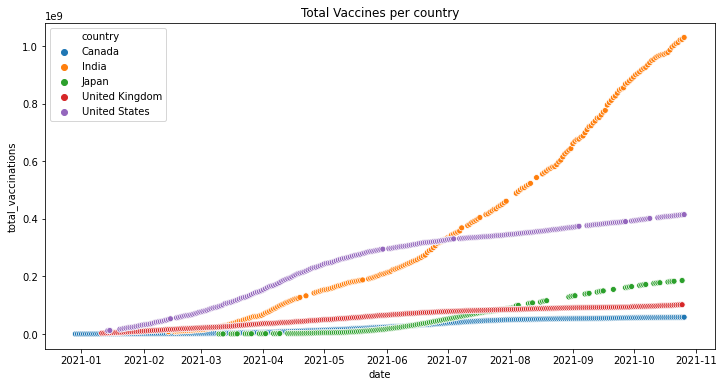

In [150]:
#Total number of people vaccinated in India, UK, US, Japan, Canada

plt.figure(figsize = (12,6))
sns.scatterplot(x = Vaccine_Countries['date'], y = Vaccine_Countries['total_vaccinations'], hue = Vaccine_Countries['country'])

plt.title("Total Vaccines per country")
plt.show()

In [151]:
vaccine_by_country = vaccine_data.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vaccine_by_country = vaccine_by_country.iloc[:10]
vaccine_by_country=vaccine_by_country.reset_index()
vaccine_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-09-18,2.174043e+09,1.022207e+09,13070714.0,150.53
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-10-26,1.030850e+09,3.097010e+08,10037995.0,73.98
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-10-26,4.150120e+08,1.907931e+08,3384387.0,151.96
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-10-24,2.691485e+08,1.154894e+08,2045834.0,125.77
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SWE,2021-10-26,1.859792e+08,8.879791e+07,1997542.0,160.63
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-10-26,1.834772e+08,6.913012e+07,1897011.0,66.39
6,"Pfizer/BioNTech, Sinovac",Turkey,TUR,2021-10-26,1.156746e+08,4.831975e+07,1264431.0,136.02
7,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-10-24,1.156246e+08,5.385392e+07,1088095.0,88.76
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-10-26,1.109504e+08,5.511270e+07,874929.0,169.02
9,"EpiVacCorona, Sputnik V",Russia,RUS,2021-10-23,1.007667e+08,4.790530e+07,1020075.0,69.06


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001'),
  Text(1, 0, 'Covaxin, Oxford/AstraZeneca, Sputnik V'),
  Text(2, 0, 'Johnson&Johnson, Moderna, Pfizer/BioNTech'),
  Text(3, 0, 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'),
  Text(4, 0, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(5, 0, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac'),
  Text(6, 0, 'Pfizer/BioNTech, Sinovac'),
  Text(7, 0, 'CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V'),
  Text(8, 0, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(9, 0, 'EpiVacCorona, Sputnik V')])

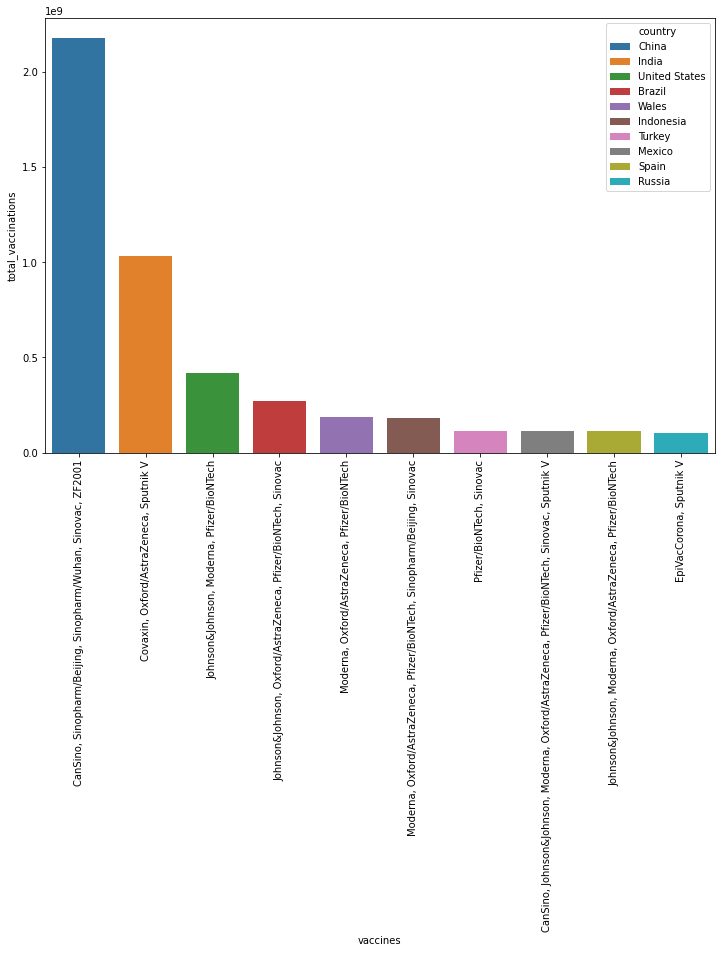

In [152]:
#Type of Covid Vaccines used by different countries

plt.figure(figsize=(12,8))
sns.barplot(data = vaccine_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

In [153]:
#Number of People Vaccinated in different countries per hundred people

fig = px.choropleth(vaccine_data.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.YlGn,
                   title= "Total vaccinations per 100")

fig.show()

In [155]:
Vaccine_India = vaccine_data[vaccine_data['country'] == 'India'].copy()
Vaccine_India

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
21895,India,IND,2021-02-13,8.052454e+06,7668.0,325305.0,0.58,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21898,India,IND,2021-02-16,8.857341e+06,216339.0,320826.0,0.64,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21899,India,IND,2021-02-17,9.186757e+06,342116.0,309949.0,0.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21900,India,IND,2021-02-18,9.846523e+06,464932.0,334502.0,0.71,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21901,India,IND,2021-02-19,1.044994e+07,756942.0,354614.0,0.75,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...
22146,India,IND,2021-10-22,1.009946e+09,297541073.0,5540317.0,72.48,"Covaxin, Oxford/AstraZeneca, Sputnik V"
22147,India,IND,2021-10-23,1.013637e+09,299553298.0,5850184.0,72.75,"Covaxin, Oxford/AstraZeneca, Sputnik V"
22148,India,IND,2021-10-24,1.022268e+09,304591540.0,6560451.0,73.36,"Covaxin, Oxford/AstraZeneca, Sputnik V"
22149,India,IND,2021-10-25,1.024150e+09,305705808.0,6456459.0,73.50,"Covaxin, Oxford/AstraZeneca, Sputnik V"


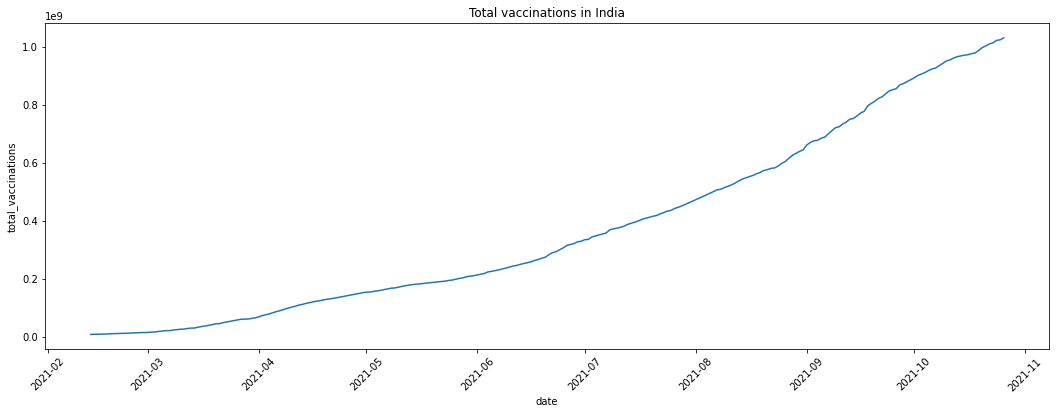

In [106]:
#Total number of People vaccinated in India

plt.figure(figsize=(18,6))
sns.lineplot(data=Vaccine_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in India')

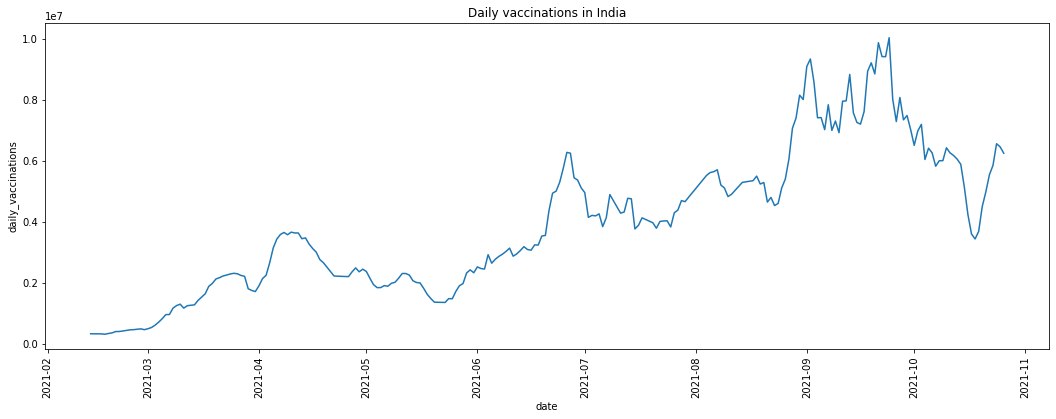

In [107]:
#Number of people vaccinated in india by Date

plt.figure(figsize=(18,6))
sns.lineplot(data=Vaccine_India, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")

,vaccines,country,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,2021-09-18,2.174043e+09,1.022207e+09,13070714.0,150.53
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,2021-10-26,1.030850e+09,3.097010e+08,10037995.0,73.98
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,2021-10-26,4.150120e+08,1.907931e+08,3384387.0,151.96
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,2021-10-24,2.691485e+08,1.154894e+08,2045834.0,125.77
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,2021-10-26,1.859792e+08,8.879791e+07,1997542.0,160.63
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,2021-10-26,1.834772e+08,6.913012e+07,1897011.0,66.39
6,"Pfizer/BioNTech, Sinovac",Turkey,2021-10-26,1.156746e+08,4.831975e+07,1264431.0,136.02
7,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,2021-10-24,1.156246e+08,5.385392e+07,1088095.0,88.76
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,2021-10-26,1.109504e+08,5.511270e+07,874929.0,169.02
9,"EpiVacCorona, Sputnik V",Russia,2021-10-23,1.007667e+08,4.790530e+07,1020075.0,69.06
